In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import scipy.stats as st

#remove warning messages that are annoyting >:(
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('./clean_datasets/all_merged_data.csv')
df.head()

,Unnamed: 0,month_year,cases,cat_adoption,cat_surrender,dog_adoption,dog_surrender,blank
0,26,2017-10,NaN,199,192,685,537,NaN
1,27,2017-11,NaN,204,127,686,432,NaN
2,28,2017-12,NaN,181,106,496,387,NaN
3,29,2018-01,NaN,162,128,659,563,NaN
4,30,2018-02,NaN,89,56,487,441,NaN


In [15]:
df['year'] = df['month_year'].str.split('-',1,expand=True)[0]
df.head()

,Unnamed: 0,month_year,cases,cat_adoption,cat_surrender,dog_adoption,dog_surrender,blank,year
0,26,2017-10,NaN,199,192,685,537,NaN,2017
1,27,2017-11,NaN,204,127,686,432,NaN,2017
2,28,2017-12,NaN,181,106,496,387,NaN,2017
3,29,2018-01,NaN,162,128,659,563,NaN,2018
4,30,2018-02,NaN,89,56,487,441,NaN,2018


In [62]:
data_mean = df.groupby('year').mean()
data_mean = data_mean[data_mean.index.isin(['2019', '2022'])]
data_sem = df.groupby('year').sem()
data_sem = data_sem[data_sem.index.isin(['2019', '2022'])]
category = ['cat_adoption', 'dog_adoption', 'cat_surrender', 'dog_surrender']
for c in category:
    a = df.loc[df['year'] == '2019', c].to_numpy()
    b = df.loc[df['year'] == '2022', c].to_numpy()
    print(f'For {c}, {st.ttest_ind(a,b)}')
    

For cat_adoption, Ttest_indResult(statistic=3.9954597627263966, pvalue=0.0007741799640520793)
For dog_adoption, Ttest_indResult(statistic=3.9338184207196893, pvalue=0.0008912373463463425)
For cat_surrender, Ttest_indResult(statistic=3.9503614573698482, pvalue=0.0008581872656143924)
For dog_surrender, Ttest_indResult(statistic=6.164353022652193, pvalue=6.3454800506290125e-06)


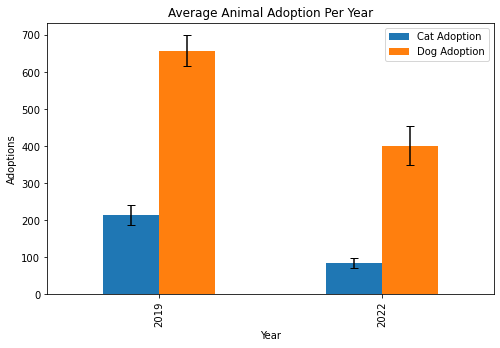

In [63]:
data_mean[['cat_adoption', 'dog_adoption']].plot(kind='bar', yerr = data_sem[['cat_adoption', 'dog_adoption']], figsize=(8,5), capsize = 4)
plt.legend(['Cat Adoption', 'Dog Adoption'])
plt.title('Average Animal Adoption Per Year')
plt.ylabel('Adoptions')
plt.xlabel('Year')
plt.savefig('./plots/adoptions_per_year.png')
plt.show()

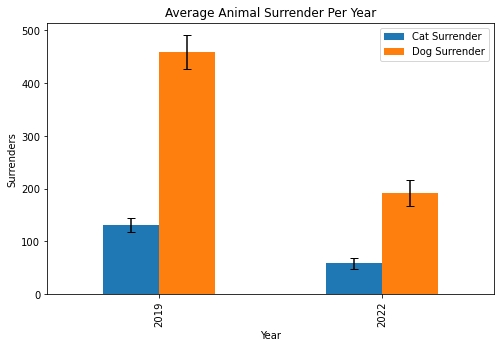

In [64]:
data_mean[['cat_surrender', 'dog_surrender']].plot(kind='bar', yerr = data_sem[['cat_surrender', 'dog_surrender']], figsize=(8,5), capsize = 4)
plt.legend(['Cat Surrender', 'Dog Surrender'])
plt.title('Average Animal Surrender Per Year')
plt.ylabel('Surrenders')
plt.xlabel('Year')
plt.savefig('./plots/surrender_per_year.png')
plt.show()